In [14]:
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
real_data = pd.read_csv("https://raw.githubusercontent.com/ErikHartman/pepnets/main/data/data.csv")
real_data = real_data[real_data["Protein"] == "PR39"]
real_data.head(3)

,Protein,Peptide,Start,End,Mods,Sample 17 Day 1,Sample 18 Day 1,Sample 19 Day 1,Sample 20 Day 1,Sample 21 Day 1,...,Sample 57 Day 3,Sample 6 Day 1,Sample 7 Day 1,Sample 8 Day 1,Sample 9 Day 1,Sample 6 Day 2,Sample 7 Day 2,Sample 8 Day 2,Sample 9 Day 2,id
557,PR39,DRLNEQSSEANLY,43,55,|,13.605245,14.669737,14.962648,12.398288,14.212164,...,14.968922,10.896371,11.055976,13.716064,11.392068,13.473538,13.377629,13.232903,NaN,557
558,PR39,AVDRLNEQSSEANLY,41,55,|,12.332647,11.958651,13.801851,10.587857,12.707897,...,11.773213,9.312961,9.752348,11.929595,10.642621,10.461541,11.345801,11.422428,NaN,558
559,PR39,ELDQPPKADEDPGTPKPV,59,76,|,18.569529,17.539295,17.972366,18.248342,17.877842,...,18.406572,17.939434,17.692968,16.302622,15.984872,16.230713,16.731639,16.329504,NaN,559


In [16]:
df = pd.melt(real_data, id_vars=['Peptide'], value_vars=[c for c in real_data.columns if "Sample" in c])
df = df.dropna(subset=["value"])
df.head(3)

,Peptide,variable,value
0,DRLNEQSSEANLY,Sample 17 Day 1,13.605245
1,AVDRLNEQSSEANLY,Sample 17 Day 1,12.332647
2,ELDQPPKADEDPGTPKPV,Sample 17 Day 1,18.569529


In [17]:
from disassembly.simulate_proteolysis import amino_acids
frequencies = {aa:0 for aa in amino_acids.values()}

for i, row in df.iterrows():
    print(f"\r{i} / {len(df.index)}", end="")
    peptide = row["Peptide"]
    value = row["value"]
    for amino_acid in peptide:
        frequencies[amino_acid] += value
frequencies

22977 / 4799

{'V': 17363.080892856095,
 'I': 10167.326631400285,
 'L': 48119.9738909735,
 'E': 55488.248883218635,
 'Q': 27947.77520860869,
 'D': 66557.12951514147,
 'N': 18940.241108896964,
 'H': 188.03947808903624,
 'W': 0,
 'F': 24894.21786649709,
 'Y': 6620.159557516371,
 'R': 44393.663453565816,
 'K': 35408.84776744999,
 'S': 23638.10791156641,
 'T': 19640.8924165875,
 'M': 0,
 'A': 30951.66767911912,
 'G': 30341.765971718334,
 'P': 192363.5421148332,
 'C': 16.422173077509395}

<BarContainer object of 20 artists>

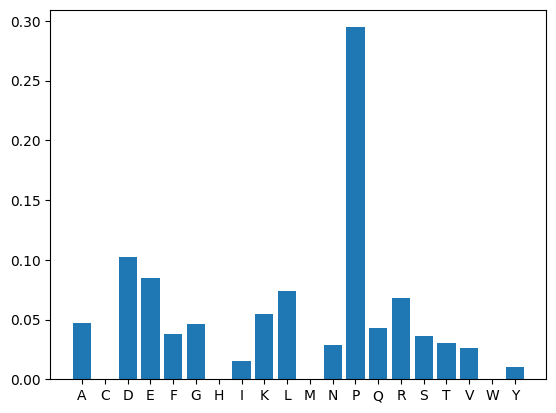

In [18]:
frequencies_sum = sum(frequencies.values())
dist = {aa:f/frequencies_sum for aa,f in frequencies.items()}
dist = dict(sorted(dist.items()))

plt.bar(x=dist.keys(), height=dist.values())

In [19]:
pd.DataFrame(dist, index=["relative_frequency"]).T.to_csv("../amino_acid_distribution.csv")

test